In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          6.6889 ( 6.4281,  7.2460) ( 6.3816,  7.1276)  0.7460 (Jnode 106)\n',
 't_n56          6.5162 ( 6.3710,  6.6957) ( 6.3651,  6.6871)  0.3220 (Jnode 105)\n',
 't_n57          6.3578 ( 6.2468,  6.4658) ( 6.2531,  6.4704)  0.2173 (Jnode 104)\n',
 't_n58          6.0604 ( 5.9462,  6.1699) ( 5.9453,  6.1683)  0.2230 (Jnode 103)\n',
 't_n59          5.9887 ( 5.8745,  6.0996) ( 5.8758,  6.1005)  0.2247 (Jnode 102)\n',
 't_n60          5.8867 ( 5.7602,  6.0069) ( 5.7633,  6.0093)  0.2460 (Jnode 101)\n',
 't_n61          5.7344 ( 5.5544,  5.8809) ( 5.5675,  5.8910)  0.3234 (Jnode 100)\n',
 't_n62          4.0240 ( 1.9470,  5.0611) ( 2.4893,  5.2244)  2.7351 (Jnode 99)\n',
 't_n63          5.0924 ( 4.8302,  5.3474) ( 4.8200,  5.3342)  0.5141 (Jnode 98)\n',
 't_n64          4.5290 ( 4.3854,  4.6804) ( 4.3942,  4.6878)  0.2936 (Jnode 97)\n',
 't_n65          4.2687 ( 4.2084,  4.4132) ( 4.2060,  4.3819)  0.1759 (Jnode 96)\n',
 't_n66          3.4970 ( 3.4537,  3.5189) ( 3.4599,  3.52

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[6.6889,
 6.5162,
 6.3578,
 6.0604,
 5.9887,
 5.8867,
 5.7344,
 4.024,
 5.0924,
 4.529,
 4.2687,
 3.497,
 3.1991,
 1.882,
 0.9146,
 4.4026,
 5.9331,
 5.8315,
 5.7565,
 5.0397,
 4.7554,
 5.166,
 5.8781,
 5.7666,
 5.6837,
 5.5274,
 5.3582,
 5.3074,
 5.1537,
 5.02,
 4.8599,
 4.0879,
 3.8267,
 5.0797,
 4.6123,
 5.8389,
 2.811,
 5.7874,
 5.655,
 5.4553,
 5.3267,
 4.6175,
 4.9421,
 5.271,
 5.1663,
 4.9187,
 4.1177,
 4.8465,
 6.1134,
 5.3912,
 4.2512,
 3.9318,
 5.4631]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[6.7495,
 6.6133,
 6.3623,
 6.0956,
 5.9964,
 5.861,
 5.651,
 4.2052,
 5.0787,
 4.5599,
 4.2716,
 3.4944,
 3.2013,
 1.8776,
 0.9233,
 4.4281,
 5.8848,
 5.3372,
 5.6848,
 5.0547,
 4.6493,
 5.1645,
 5.9212,
 5.7859,
 5.6801,
 5.5436,
 5.3807,
 5.3049,
 5.1558,
 5.0196,
 4.8201,
 4.2208,
 3.7903,
 5.1008,
 4.6188,
 5.8597,
 3.6637,
 5.7911,
 5.6534,
 5.4606,
 5.3256,
 4.7504,
 4.9187,
 5.3106,
 5.0963,
 4.6439,
 4.3634,
 4.8983,
 6.1082,
 5.4725,
 4.4263,
 4.4383,
 5.6273]

In [26]:
posterior_mean_iqtree

[6.6889,
 6.5162,
 6.3578,
 6.0604,
 5.9887,
 5.8867,
 5.7344,
 4.024,
 5.0924,
 4.529,
 4.2687,
 3.497,
 3.1991,
 1.882,
 0.9146,
 4.4026,
 5.9331,
 5.8315,
 5.7565,
 5.0397,
 4.7554,
 5.166,
 5.8781,
 5.7666,
 5.6837,
 5.5274,
 5.3582,
 5.3074,
 5.1537,
 5.02,
 4.8599,
 4.0879,
 3.8267,
 5.0797,
 4.6123,
 5.8389,
 2.811,
 5.7874,
 5.655,
 5.4553,
 5.3267,
 4.6175,
 4.9421,
 5.271,
 5.1663,
 4.9187,
 4.1177,
 4.8465,
 6.1134,
 5.3912,
 4.2512,
 3.9318,
 5.4631]

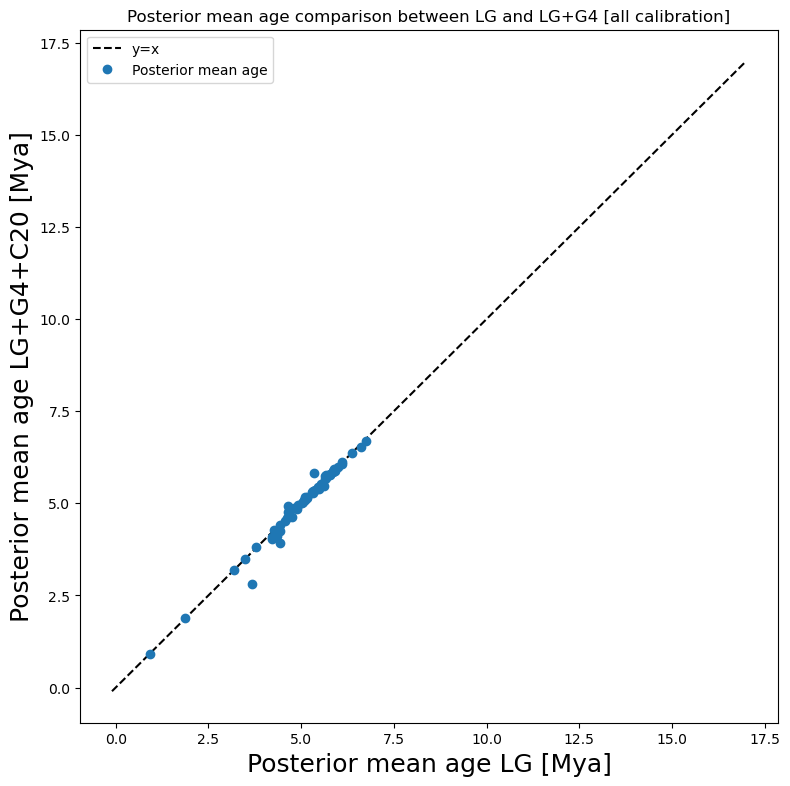

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [all calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('metazoa_posterior_mean_age_comparison_LG_G4_C20_all_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')